In [4]:
# Firstname Lastname
# abc123

## Lab 5A

*Lab 5 consists of two exercises. This is the first of two exercises, which will cover regressions and time series data.*

In this exercise, you will conduct a simple linear regression analysis on home data value data and plot a regression line on three metropolitan areas in the United States. 

### Dataset 

This exercise will use the CSV file ```Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_mon.csv```. This dataset comes from [Zillow research data](https://www.zillow.com/research/data/) and contains the Zillow Home Value Index (ZHVI), which is "A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type". 

### Tasks

1. Read in the ```Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_mon.csv``` CSV file as a ```DataFrame```. 
2. Note that the data is in the wide form. You should transform it to the long form using ```melt()```. Only include the data for the metropolitan areas of San Antonio, TX, New York City, NY, and a third area of your choice. Make sure that your third area has data. 
3. Conduct a simple linear regression where the independent variable is the year and the dependent variable is the average home value index for that year for each metroplitan area using ```linregress()```. 
4. Using the results of your linear regression analysis, compute the predicted home values for the year 2030.
5. Create a ```regplot()``` for each of the metroplitan areas. The regplot should extend the line to the year 2030. You can select any approach to creating these multiple plots (e.g., subplots, facet grids, etc.)
6. Answer the questions below. 

In [5]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

class MetropolitanArea:
    def __init__(self, region_name):
        self.region_name = region_name
        self.df = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_mon.csv')
        self.df = self.df.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], 
                               var_name='Date', value_name='ZHVI')
        self.df = self.df[self.df['RegionName'] == self.region_name]
        self.df['Date'] = self.df['Date'].str.extract(r'(\d{4})').astype(int)
        self.slope, self.intercept, self.r_value, self.p_value, self.std_err = linregress(self.df['Date'], self.df['ZHVI'])
    
    def predict_home_value(self, year):
        return self.slope * year + self.intercept

    def plot_data(self, ax):
        sns.regplot(x='Date', y='ZHVI', data=self.df, ax=ax, label='data')
        x_values = np.arange(1996, 2031)
        y_values = self.predict_home_value(x_values)
        ax.plot(x_values, y_values, color='red', label='regression line')
        r_squared = round(self.r_value ** 2, 2)
        line_formula = f'y = {round(self.slope, 2)}x + {round(self.intercept, 2)}'
        ax.text(0.20, 0.15, f'R-squared = {r_squared}\n{line_formula}', transform=ax.transAxes, va='top')
        ax.set_title(self.region_name)
        ax.set_xlabel('Year')
        ax.set_ylabel('ZHVI')
        ax.set_xlim(1996, 2030)
        ax.set_ylim(0, 1000000)
        ax.legend()

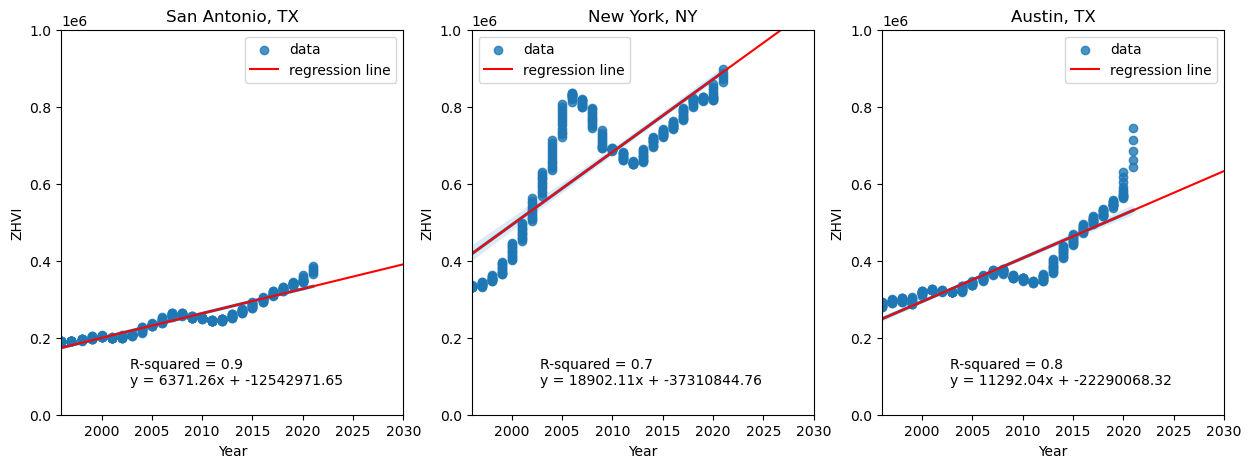

In [6]:
# Your visualization code goes here
# Create the metropolitan areas
sa = MetropolitanArea('San Antonio, TX')
nyc = MetropolitanArea('New York, NY')
third_area = MetropolitanArea('Austin, TX')

# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the data for each metropolitan area
sa.plot_data(ax=axes[0])
nyc.plot_data(ax=axes[1])
third_area.plot_data(ax=axes[2])

plt.show()

### Questions

Answer the following questions:

1. Based on your linear regression analysis, what are the predicted home values in 2030 in each of your metroplitan areas? 

2. How are the predicted home values for 2030 in line with what current real estate trends show with respect to those metroplitan areas? 

3. Looking at your regplot, are there are spikes or dips in home values in past? If so, what are some possible reasons for them in those regions? If there were no major spikes and dips, what are some possible reasons for a steady change in home values for those metropolitan regions? Find some sources to support those explanations.


### Answers

Enter your responses here. 
